<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/Nearest-Earth-Planet/Nearest_earth_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset link

https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

In [5]:
!nvidia-smi

Wed Jul 27 19:23:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [8]:
!unzip archive.zip

Archive:  archive.zip
  inflating: neo.csv                 
  inflating: neo_v2.csv              


In [5]:
neo_df = pd.read_csv("neo.csv")
neo_df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
neo_df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [8]:
neo_df.shape

(90836, 10)

In [9]:
## Here id, name, and orbiting_body have no use
## orbiting body is only earth in this case
## Drop the id, name, and orbiting_body

neo_df.drop(['id', 'name', 'orbiting_body'], axis = 1, inplace = True)
neo_df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True


In [10]:
neo_df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


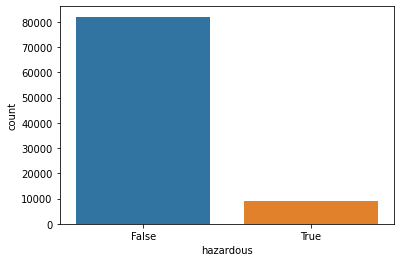

In [11]:
## Checking the bias of data
sns.countplot(data = neo_df, x = 'hazardous')

In [12]:
## Here data is highly biased
neo_df['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [13]:
## Converting the boolean value into integer values
neo_df['hazardous'] = neo_df['hazardous'].apply(lambda x : x*1)
neo_df['sentry_object'] = neo_df['sentry_object'].apply(lambda x : x*1)

In [14]:
neo_df.head(2)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,0,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,0,20.00,1


In [15]:
## Scaling the relative_velocity and miss_distance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
## before scaling the data let first split the data into train and test split
from sklearn.model_selection import train_test_split

X = neo_df.drop('hazardous', axis = 1)
y = neo_df['hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72668, 6), (18168, 6), (72668,), (18168,))

In [17]:
## now scaling the data of relative_velocity and miss_distance
X_train[['relative_velocity', 'miss_distance']] = scaler.fit_transform(X_train[['relative_velocity', 'miss_distance']])

In [18]:
X_test[['relative_velocity', 'miss_distance']] = scaler.transform(X_test[['relative_velocity', 'miss_distance']])

In [19]:
## Fistly applying the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Traning accuracy : ", accuracy_score(train_pred, y_train))
print("Test accuracy : ", accuracy_score(test_pred, y_test))
print("classification_report : \n", classification_report(test_pred, y_test))

Traning accuracy :  0.9012495183574614
Test accuracy :  0.9053830911492734
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     17868
           1       0.09      0.52      0.15       300

    accuracy                           0.91     18168
   macro avg       0.54      0.71      0.55     18168
weighted avg       0.98      0.91      0.94     18168



In [20]:
## Here recall is around 50% for hazardous because of imbalance data

In [21]:
## Now trying the randomForest classifier

from sklearn.ensemble import RandomForestClassifier as rf

model = rf()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Traning accuracy : ", accuracy_score(train_pred, y_train))
print("Test accuracy : ", accuracy_score(test_pred, y_test))
print("classification_report : \n", classification_report(test_pred, y_test))


Traning accuracy :  0.9999724775692189
Test accuracy :  0.9214002642007926
classification_report : 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     16955
           1       0.44      0.62      0.51      1213

    accuracy                           0.92     18168
   macro avg       0.71      0.78      0.74     18168
weighted avg       0.94      0.92      0.93     18168



In [22]:
## Still recall value not much good but precision and f1 score is better than previous one.

In [23]:
!pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
## Now trying to balance the data using
from collections import Counter

from imblearn import over_sampling
smote = over_sampling.SMOTE(random_state = 0)
X_res, y_res = smote.fit_resample(X, y)
print(Counter(y_res))
X_res.shape, y_res.shape


Counter({0: 81996, 1: 81996})


((163992, 6), (163992,))

In [25]:
X_res[:5]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,0,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,0,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,0,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,0,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,0,20.09


In [26]:
## now again performing the train and test split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((131193, 6), (32799, 6), (131193,), (32799,))

In [27]:
## now scaling the data of relative_velocity and miss_distance
X_train[['relative_velocity', 'miss_distance']] = scaler.fit_transform(X_train[['relative_velocity', 'miss_distance']])
X_test[['relative_velocity', 'miss_distance']] = scaler.transform(X_test[['relative_velocity', 'miss_distance']])

In [28]:

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Traning accuracy : ", accuracy_score(train_pred, y_train))
print("Test accuracy : ", accuracy_score(test_pred, y_test))
print("classification_report : \n", classification_report(test_pred, y_test))

Traning accuracy :  0.8616389593956995
Test accuracy :  0.8602701301868959
classification_report : 
               precision    recall  f1-score   support

           0       0.77      0.94      0.85     13421
           1       0.95      0.81      0.87     19378

    accuracy                           0.86     32799
   macro avg       0.86      0.87      0.86     32799
weighted avg       0.88      0.86      0.86     32799



In [29]:
## Here recall and precision value is high for 1

In [34]:
## Trying the randomfores
model = rf()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Traning accuracy : ", accuracy_score(train_pred, y_train))
print("Test accuracy : ", accuracy_score(test_pred, y_test))
print("classification_report : \n", classification_report(test_pred, y_test))

Traning accuracy :  0.9999847552841996
Test accuracy :  0.9485045275770603
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     16243
           1       0.95      0.95      0.95     16556

    accuracy                           0.95     32799
   macro avg       0.95      0.95      0.95     32799
weighted avg       0.95      0.95      0.95     32799



In [35]:
## Randomforest gave around 95% accuracy